## Install Libraries

In [1]:
!pip3 install -r requirements_current.txt

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [2]:
# Generate requirements_current.txt
# ! pip list --format=freeze > requirements_current.txt

# Import Libraries

In [3]:
import importlib

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import models
import parameters
import preprocessing

In [6]:
importlib.reload(models)
importlib.reload(parameters)
importlib.reload(preprocessing)

<module 'preprocessing' from '/Users/kevinchs0808/Desktop/DSA4263/final-project/preprocessing.py'>

# Helper Function

In [7]:
import shap
from sklearn.model_selection import StratifiedShuffleSplit
def explain_model(model, X_test, y_test):
        # Stratified sampling
        stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=100, random_state=42)
        _, sample_indices = next(stratified_split.split(X_test, y_test))
        X_sampled = X_test.iloc[sample_indices]

        explainer = shap.Explainer(model.predict, X_sampled)
        shap_values = explainer(X_sampled)
        shap.plots.beeswarm(shap_values)

#mlp_model.shap_explanation()

# Import Dataset

In [8]:
df = pd.read_csv("Data/Raw/insurance_claims.csv")

# EDA Insight

# Random Forest New

In [9]:
import json
from sklearn.ensemble import RandomForestClassifier

# NOT ACTUAL PARAMS
tuned_params = {
    "n_estimators": 100,
    "max_depth": 10,
    "min_samples_split": 2,
    "min_samples_leaf": 1,
    "max_features": "auto",
    "bootstrap": True
}

In [10]:
X_train_non_normalized, X_test_non_normalized, y_train_non_normalized, y_test_non_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=False)
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=True)

In [11]:
rf_model = models.IndividualModel(
    model_func = RandomForestClassifier,
    param_info = parameters.RANDOM_FOREST_INFORMATION,
    X_train = X_train_non_normalized,
    X_test = X_test_non_normalized,
    y_train = y_train_non_normalized,
    y_test = y_test_non_normalized
    )

## Results without Tuning

In [12]:
rf_model.train()
rf_model.predict()

In [13]:
# No Tuning is already decent, with bad recall though
rf_model.evaluate()

{'accuracy': 0.815,
 'precision': 0.6363636363636364,
 'recall': 0.5714285714285714,
 'f1_score': 0.6021505376344085}

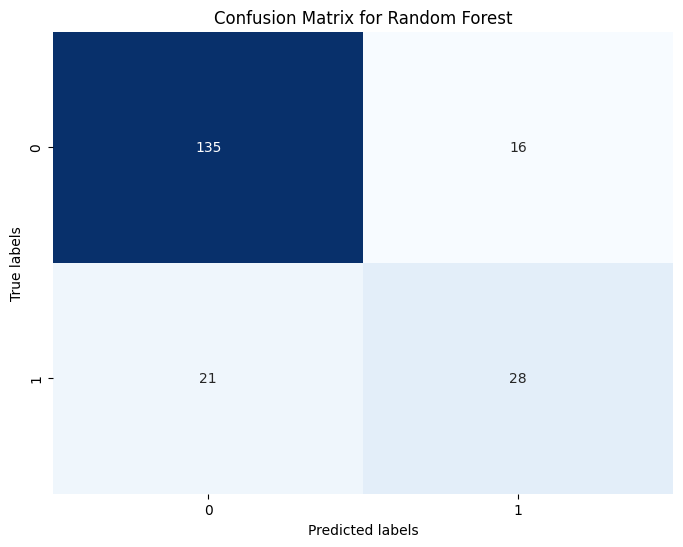

In [14]:
cm_rf_base = rf_model.plot_confusion_matrix()

## Results with Tuning

In [15]:
rf_model.finetune()

[I 2024-04-07 12:50:21,421] A new study created in memory with name: no-name-b0c8c692-a346-407c-80e0-cb099a4c7b66
[I 2024-04-07 12:50:23,583] Trial 0 finished with value: 0.6231431966726084 and parameters: {'n_estimators': 400, 'max_depth': 7, 'criterion': 'entropy'}. Best is trial 0 with value: 0.6231431966726084.
[I 2024-04-07 12:50:24,888] Trial 1 finished with value: 0.6211075205640423 and parameters: {'n_estimators': 100, 'max_depth': 1, 'criterion': 'entropy'}. Best is trial 0 with value: 0.6231431966726084.
[I 2024-04-07 12:50:26,666] Trial 2 finished with value: 0.6263214919593847 and parameters: {'n_estimators': 400, 'max_depth': 1, 'criterion': 'log_loss'}. Best is trial 2 with value: 0.6263214919593847.
[I 2024-04-07 12:50:27,984] Trial 3 finished with value: 0.6373146759953356 and parameters: {'n_estimators': 100, 'max_depth': 2, 'criterion': 'gini'}. Best is trial 3 with value: 0.6373146759953356.
[I 2024-04-07 12:50:29,747] Trial 4 finished with value: 0.6259076967890066 

(0.6417017870524694,
 {'n_estimators': 200, 'max_depth': 4, 'criterion': 'gini'})

In [16]:
rf_model.train()
rf_model.predict()

rf_model.evaluate()

{'accuracy': 0.825,
 'precision': 0.625,
 'recall': 0.7142857142857143,
 'f1_score': 0.6666666666666666}

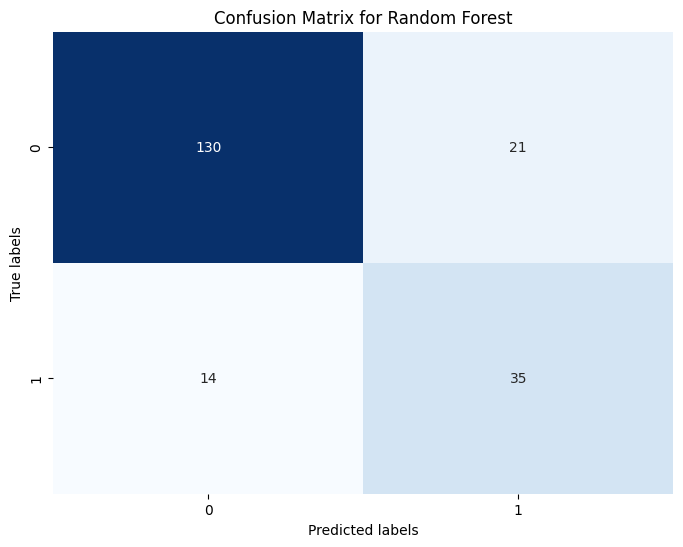

In [17]:
cm_rf_tuned = rf_model.plot_confusion_matrix()

## Model Explanation

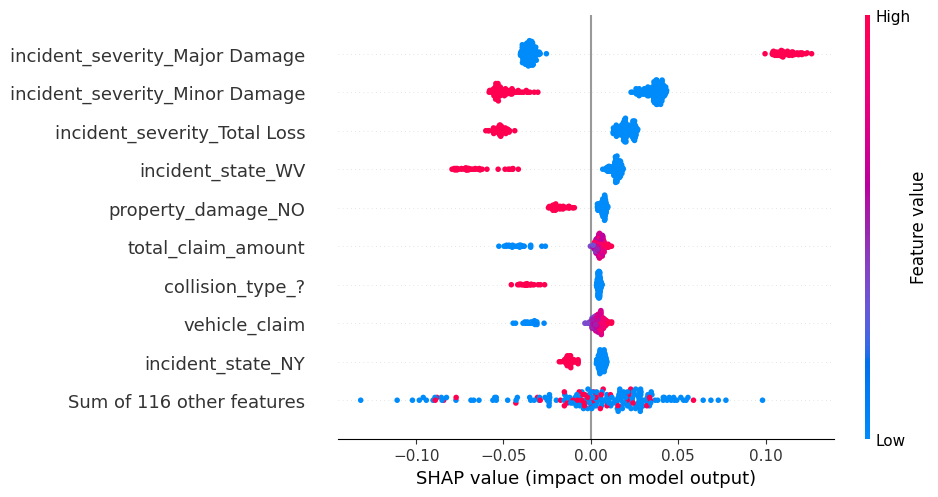

In [18]:
rf_model.shap_explanation(is_tree=True, class_to_observe=1)

PermutationExplainer explainer: 101it [00:13,  2.04it/s]                         


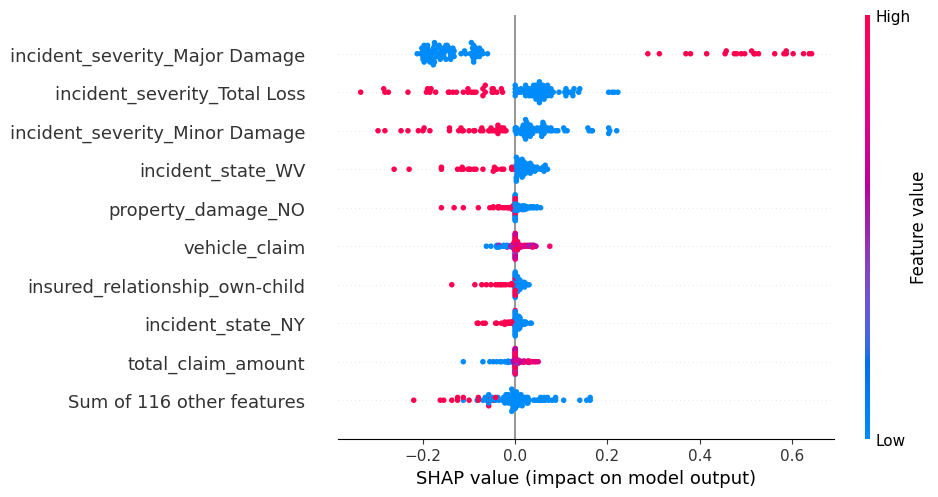

In [19]:
explain_model(rf_model.model, rf_model.X_test, rf_model.y_test)

# Decision Tree

In [20]:
import json
from sklearn.tree import DecisionTreeClassifier

# NOT ACTUAL PARAMS
tuned_params = {
    "max_depth": 10,
    "min_samples_split": 2,
    "min_samples_leaf": 2
}

In [21]:
X_train_non_normalized, X_test_non_normalized, y_train_non_normalized, y_test_non_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=False)
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=True)

In [22]:
dt_model = models.IndividualModel(
    model_func = DecisionTreeClassifier,
    param_info = parameters.DECISION_TREE_INFORMATION,
    X_train = X_train_non_normalized,
    X_test = X_test_non_normalized,
    y_train = y_train_non_normalized,
    y_test = y_test_non_normalized
    )

## Results without Tuning

In [23]:
dt_model.train()
dt_model.predict()

In [24]:
# No Tuning is already decent, with bad recall though
dt_model.evaluate()

{'accuracy': 0.765,
 'precision': 0.5178571428571429,
 'recall': 0.5918367346938775,
 'f1_score': 0.5523809523809524}

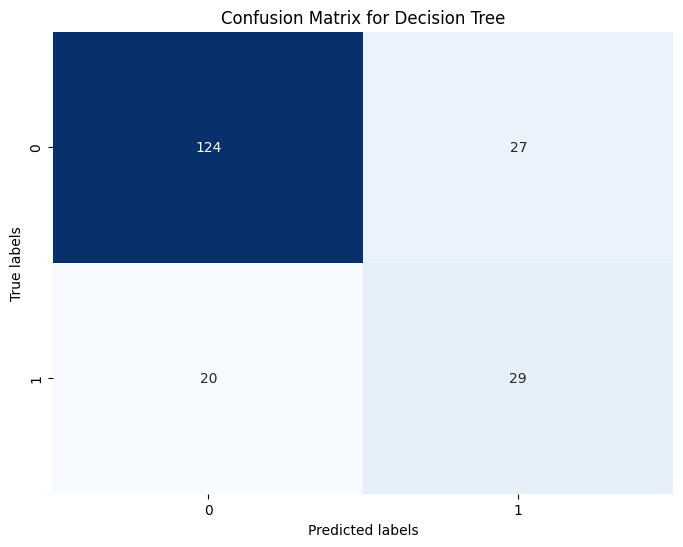

In [25]:
cm_dt_base = dt_model.plot_confusion_matrix()

## Results with Tuning

In [26]:
dt_model.finetune()

[I 2024-04-07 12:53:08,031] A new study created in memory with name: no-name-e70332f6-dc72-47e5-940b-0f01b7d61e55
[I 2024-04-07 12:53:09,202] Trial 0 finished with value: 0.6288224072741396 and parameters: {'max_depth': 1, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.6288224072741396.
[I 2024-04-07 12:53:10,387] Trial 1 finished with value: 0.5723049263789647 and parameters: {'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.6288224072741396.
[I 2024-04-07 12:53:11,565] Trial 2 finished with value: 0.6288224072741396 and parameters: {'max_depth': 1, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.6288224072741396.
[I 2024-04-07 12:53:12,737] Trial 3 finished with value: 0.5475513877048404 and parameters: {'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.6288224072741396.
[I 2024-04-07 12:53:13,907] Trial 4 finished with value: 0.6288224

(0.6647102987141923,
 {'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 2})

In [27]:
dt_model.train()
dt_model.predict()

dt_model.evaluate()

{'accuracy': 0.73,
 'precision': 0.45901639344262296,
 'recall': 0.5714285714285714,
 'f1_score': 0.5090909090909091}

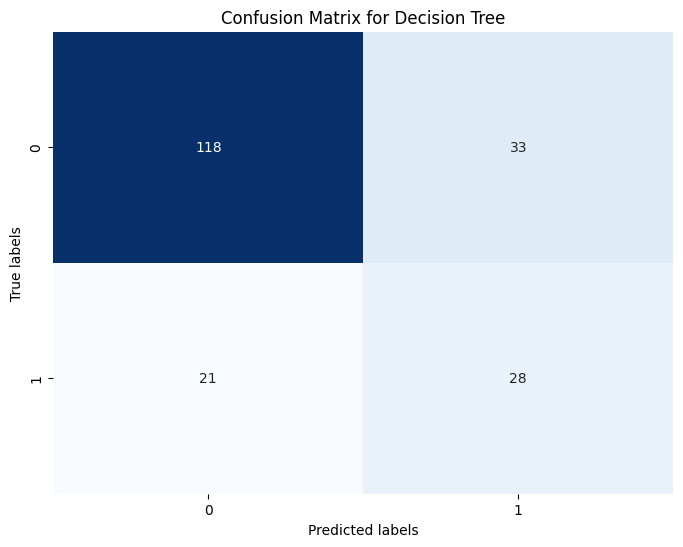

In [28]:
cm_dt_finetuned = dt_model.plot_confusion_matrix()

## Model Explanation

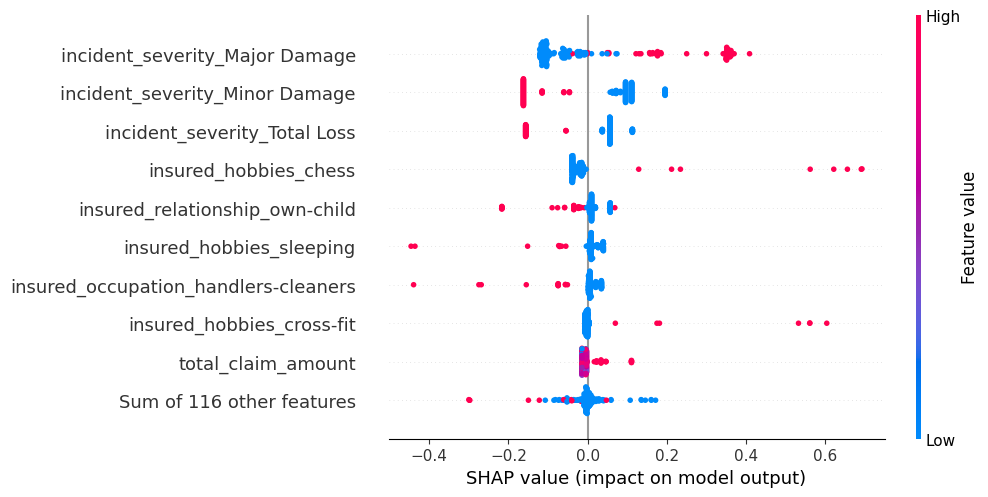

In [29]:
dt_model.shap_explanation(is_tree=True, class_to_observe=1)

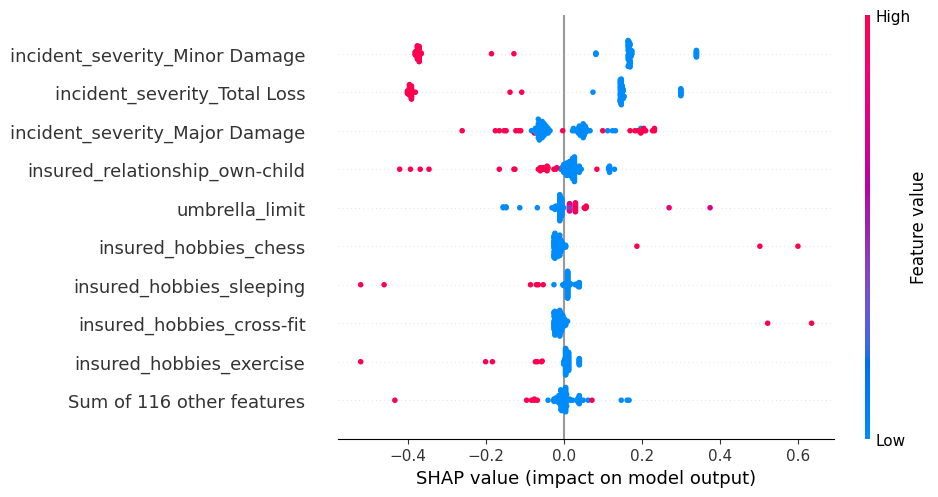

In [30]:
explain_model(dt_model.model, dt_model.X_test, dt_model.y_test)

[Text(0.5868055555555556, 0.9166666666666666, 'incident_severity_Major Damage <= 0.5\ngini = 0.5\nsamples = 1204\nvalue = [602, 602]\nclass = Y'),
 Text(0.3333333333333333, 0.75, 'insured_hobbies_chess <= 0.5\ngini = 0.378\nsamples = 688\nvalue = [514, 174]\nclass = Y'),
 Text(0.2222222222222222, 0.5833333333333334, 'insured_hobbies_cross-fit <= 0.5\ngini = 0.342\nsamples = 654\nvalue = [511, 143]\nclass = Y'),
 Text(0.1111111111111111, 0.4166666666666667, 'incident_severity_Minor Damage <= 0.5\ngini = 0.299\nsamples = 622\nvalue = [508, 114]\nclass = Y'),
 Text(0.05555555555555555, 0.25, 'incident_severity_Total Loss <= 0.5\ngini = 0.402\nsamples = 355\nvalue = [256, 99]\nclass = Y'),
 Text(0.027777777777777776, 0.08333333333333333, 'gini = 0.499\nsamples = 143\nvalue = [68, 75]\nclass = N'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.201\nsamples = 212\nvalue = [188, 24]\nclass = Y'),
 Text(0.16666666666666666, 0.25, 'total_claim_amount <= 80348.5\ngini = 0.106\nsample

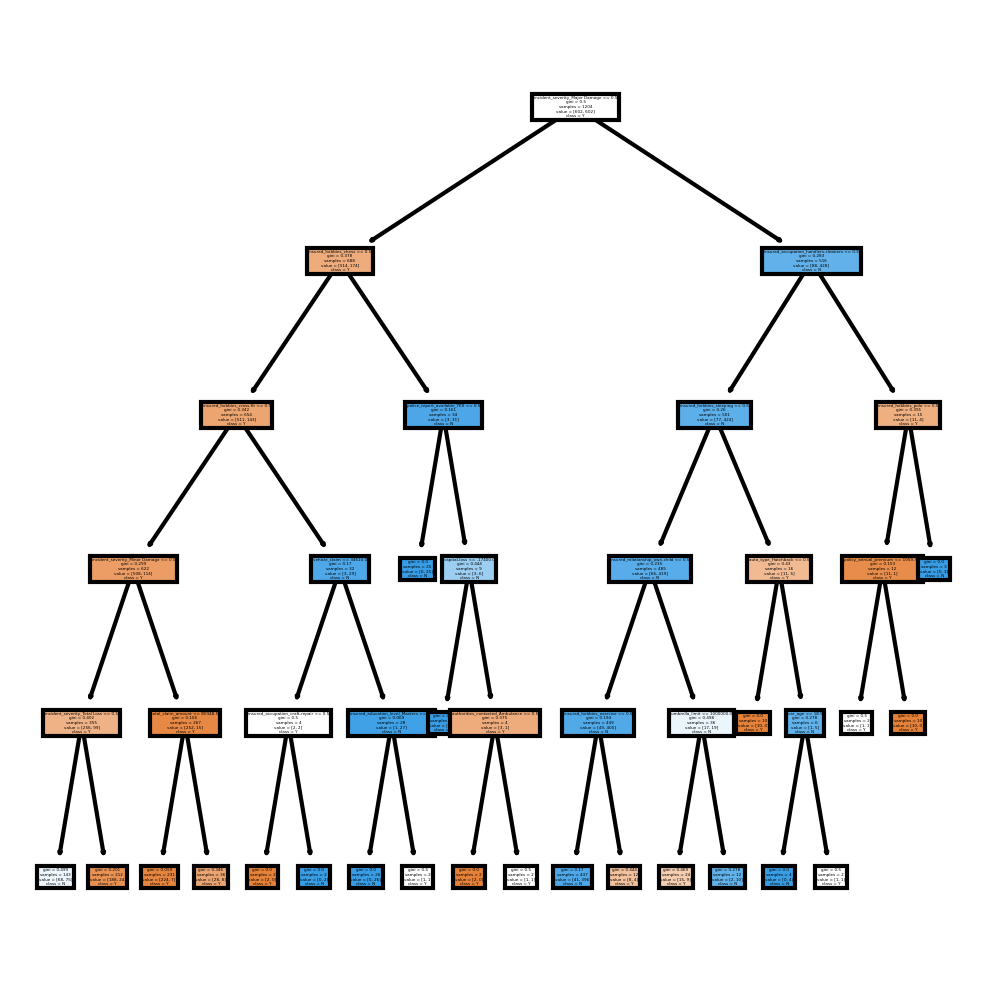

In [31]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

feature_names = list(dt_model.X_test.columns.copy())

class_names=['Y', 'N']

tree.plot_tree(dt_model.model,
               feature_names = feature_names, 
               class_names=class_names,
               filled = True)

# XGBoost

## Dataset Creation

In [32]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = preprocessing.preprocess_pipeline(
    df,
    encoding = False,
    normalization = False,
    )

In [33]:
rows_with_nan = X_train_xgb[X_train_xgb.isna().any(axis=1)]

In [34]:
# Format the data into categorical type

cate_cols = parameters.cate_cols

X_train_xgb[cate_cols] = X_train_xgb[cate_cols].astype("category")
X_test_xgb[cate_cols] = X_test_xgb[cate_cols].astype("category")

In [35]:
X_train_xgb.dtypes

months_as_customer                                 int64
age                                                int64
policy_state                                    category
policy_deductable                                  int64
policy_annual_premium                            float64
umbrella_limit                                     int64
insured_sex                                     category
insured_education_level                         category
insured_occupation                              category
insured_hobbies                                 category
insured_relationship                            category
capital-gains                                      int64
capital-loss                                       int64
incident_year                                      int64
incident_type                                   category
collision_type                                  category
incident_severity                               category
authorities_contacted          

## Model Creation

In [36]:
xgb_static_params = {
    "enable_categorical": True # Enable categorical data
}

In [37]:
from xgboost import XGBClassifier
xgb_model = models.IndividualModel(
    model_func = XGBClassifier,
    param_info = parameters.XGB_INFORMATION,
    X_train = X_train_xgb,
    X_test = X_test_xgb,
    y_train = y_train_xgb,
    y_test = y_test_xgb,
    static_params = xgb_static_params
    )

## Results with no tuning

In [38]:
xgb_model.train_predict()

xgb_model.evaluate()

{'accuracy': 0.83,
 'precision': 0.6415094339622641,
 'recall': 0.6938775510204082,
 'f1_score': 0.6666666666666666}

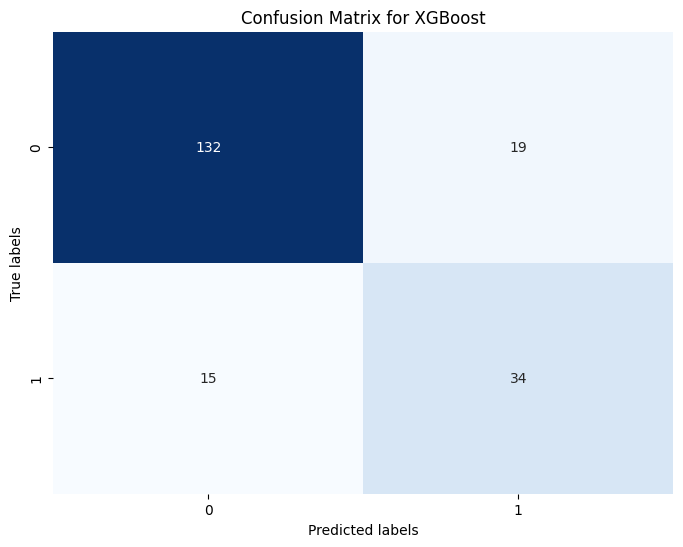

In [39]:
cm_xgb_base = xgb_model.plot_confusion_matrix()

## Results with Tuning

In [40]:
xgb_model.finetune()

[I 2024-04-07 12:55:08,485] A new study created in memory with name: no-name-15f4d7fb-29cb-4746-9337-d12a948fc930
[I 2024-04-07 12:55:10,442] Trial 0 finished with value: 0.6199993481051582 and parameters: {'n_estimators': 201, 'max_depth': 24, 'learning_rate': 0.34, 'subsample': 0.2, 'colsample_bytree': 0.4, 'gamma': 0.5, 'reg_alpha': 1.0, 'reg_lambda': 0.1}. Best is trial 0 with value: 0.6199993481051582.
[I 2024-04-07 12:55:11,231] Trial 1 finished with value: 0.719909674926934 and parameters: {'n_estimators': 23, 'max_depth': 3, 'learning_rate': 0.32, 'subsample': 0.5, 'colsample_bytree': 0.75, 'gamma': 3.2, 'reg_alpha': 1.2000000000000002, 'reg_lambda': 1.1}. Best is trial 1 with value: 0.719909674926934.
[I 2024-04-07 12:55:11,869] Trial 2 finished with value: 0.7485116430622808 and parameters: {'n_estimators': 14, 'max_depth': 15, 'learning_rate': 0.43, 'subsample': 0.2, 'colsample_bytree': 0.75, 'gamma': 4.7, 'reg_alpha': 4.0, 'reg_lambda': 2.5}. Best is trial 2 with value: 0.7

(0.7580104091905333,
 {'n_estimators': 120,
  'max_depth': 34,
  'learning_rate': 0.04,
  'subsample': 0.65,
  'colsample_bytree': 0.8,
  'gamma': 4.2,
  'reg_alpha': 2.5,
  'reg_lambda': 4.2})

In [41]:
xgb_model.train_predict()

xgb_model.evaluate()

{'accuracy': 0.845,
 'precision': 0.6451612903225806,
 'recall': 0.8163265306122449,
 'f1_score': 0.7207207207207208}

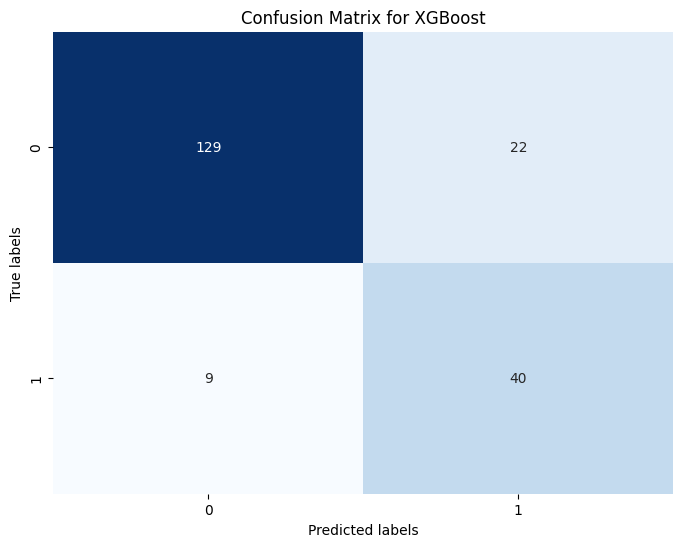

In [42]:
cm_xgb_tuned = xgb_model.plot_confusion_matrix()

## Model Explanation

### SHAP Values

In [43]:
explain_model(xgb_model.model, xgb_model.X_test, xgb_model.y_test)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [44]:
xgb_model.shap_explanation()

Found a NULL input array in _cext_dense_tree_update_weights!


TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

### XGBoost Native Explanation

<Axes: title={'center': 'Tuned XGBoost Feature Importance'}, xlabel='F score', ylabel='Features'>

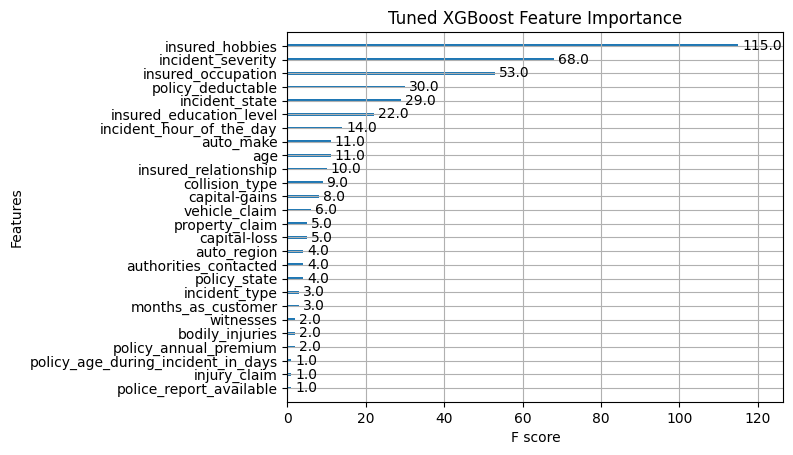

In [45]:
import xgboost as xgb

xgb.plot_importance(xgb_model.model, title="Tuned XGBoost Feature Importance")

# MLP

## Dataset creation

In [46]:
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = preprocessing.preprocess_pipeline(
    df,
    encoding = True,
    normalization = True,
    )

In [47]:
from sklearn.neural_network import MLPClassifier
mlp_static_params = {
    "random_state": 42,
    "solver": "adam" # Enable categorical data
}
mlp_model = models.IndividualModel(
    model_func=MLPClassifier,
    param_info=parameters.MLP_INFORMATION,
    X_train=X_train_mlp,
    X_test=X_test_mlp,
    y_train=y_train_mlp,
    y_test=y_test_mlp,
    static_params = mlp_static_params
)

## Baseline

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Create MLP classifier with solver='adam'
mlp_classifier = MLPClassifier(solver='adam', random_state = 42)

# Train the model
mlp_classifier.fit(X_train_mlp, y_train_mlp)

# Predict labels for the test set
y_pred = mlp_classifier.predict(X_test_mlp)

# Compute accuracy
accuracy = accuracy_score(y_test_mlp, y_pred)

# Compute precision
precision = precision_score(y_test_mlp, y_pred)

# Compute recall
recall = recall_score(y_test_mlp, y_pred)

# Compute F1-score
f1 = f1_score(y_test_mlp, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.795
Precision: 0.6428571428571429
Recall: 0.3673469387755102
F1-score: 0.4675324675324675


In [49]:
mlp_model.train_predict("RandomOverSampler")
mlp_model.evaluate()

{'accuracy': 0.27,
 'precision': 0.2512820512820513,
 'recall': 1.0,
 'f1_score': 0.4016393442622951}

In [50]:
mlp_model.finetune(oversampling_strategy = "RandomOverSampler")

[I 2024-04-07 12:57:56,642] A new study created in memory with name: no-name-8ca44dbb-fe61-4ce9-88e5-1f34f5b54429
[I 2024-04-07 12:57:57,745] Trial 0 finished with value: 0.39071999944466634 and parameters: {'hidden_layer_sizes': 170, 'alpha': 0.006, 'learning_rate_init': 0.005900000000000001, 'max_iter': 200}. Best is trial 0 with value: 0.39071999944466634.
[I 2024-04-07 12:57:58,612] Trial 1 finished with value: 0.31435246987715215 and parameters: {'hidden_layer_sizes': 90, 'alpha': 0.007300000000000001, 'learning_rate_init': 0.0088, 'max_iter': 700}. Best is trial 0 with value: 0.39071999944466634.
[I 2024-04-07 12:57:59,844] Trial 2 finished with value: 0.42061651653616583 and parameters: {'hidden_layer_sizes': 200, 'alpha': 0.0097, 'learning_rate_init': 0.009, 'max_iter': 300}. Best is trial 2 with value: 0.42061651653616583.
[I 2024-04-07 12:58:01,252] Trial 3 finished with value: 0.4766383588807619 and parameters: {'hidden_layer_sizes': 140, 'alpha': 0.0098, 'learning_rate_init

(0.6477638442788252,
 {'hidden_layer_sizes': 200,
  'alpha': 0.0079,
  'learning_rate_init': 0.0002,
  'max_iter': 500})

In [51]:
mlp_model.train_predict(oversampling_strategy = "RandomOverSampler")

mlp_model.evaluate()

{'accuracy': 0.505,
 'precision': 0.3263888888888889,
 'recall': 0.9591836734693877,
 'f1_score': 0.48704663212435234}

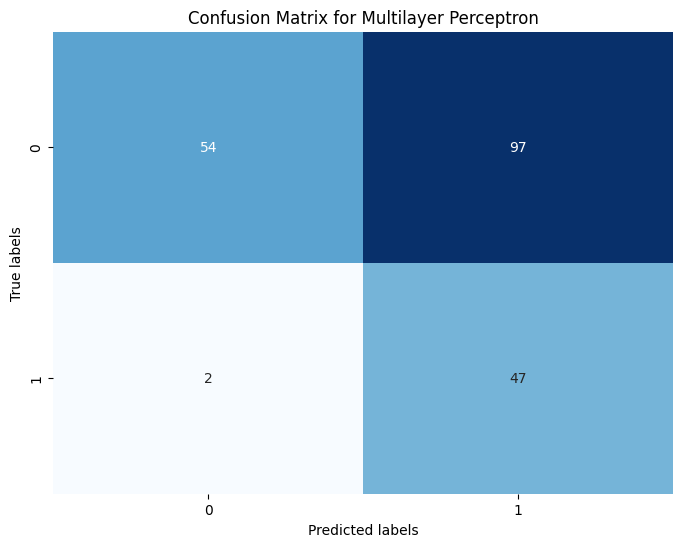

In [52]:
cm_mlp_tuned = mlp_model.plot_confusion_matrix()

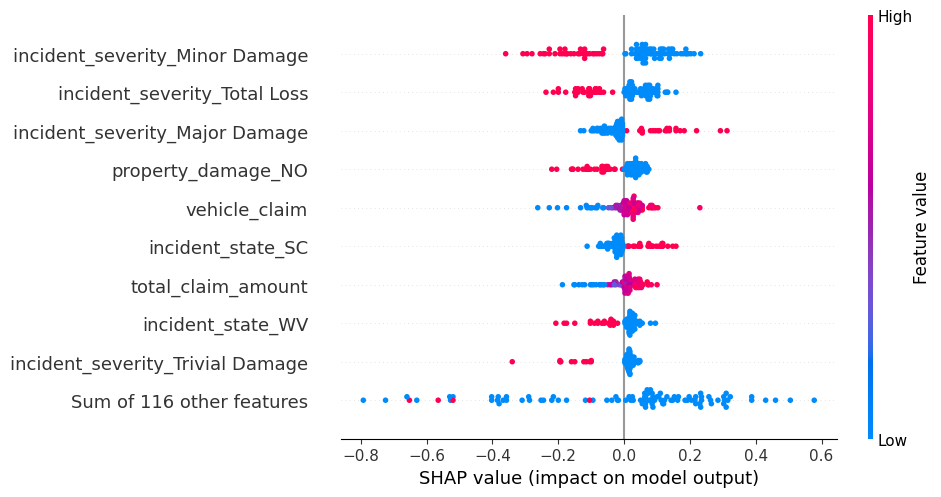

In [53]:
explain_model(mlp_model.model, mlp_model.X_test, mlp_model.y_test)

In [54]:
mlp_model.shap_explanation()

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: MLPClassifier(alpha=0.0079, hidden_layer_sizes=200, learning_rate_init=0.0002,
              max_iter=500, random_state=42)